<a href="https://colab.research.google.com/github/mobraine/Reinforcement-Learning/blob/main/COMP_579_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. [5 points] Write a small simulator for a Bernoulli bandit with k arms. The probability of success pi for each arm i ∈ {1, ...k} should be provided as an input. The bandit should have a function called ”sample” which takes as input the index of an action and provides a reward sample. Recall that a Bernoulli bandit outputs either 1 or 0, drawn from a binomial distribution of parameter pk.


In [ ]:
import numpy as np

def sample(ind, prob_list):
  return np.random.binomial(1,prob_list[ind])

def Bernoulli_K_Bandit(prob_list):
  results = []
  for i in range(len(prob_list)):
    results.append(sample(i,prob_list))
  return results


2. [5 points] Test your code with 3 arms of parameters q∗ = [0.7, , 0.7 − δ, 0.7 − 2δ], with δ = 0.2.
Generate and save a set of 100 samples for each action. For the test, plot one graph for each action,
containing the reward values obtained over the 100 draws, the empirical mean of the values, and
the true q∗ for each arm. Each graph will have an x-axis that goes to 100, two horizontal lines (true
value and estimated value) and a set of points of value 0 and 1.

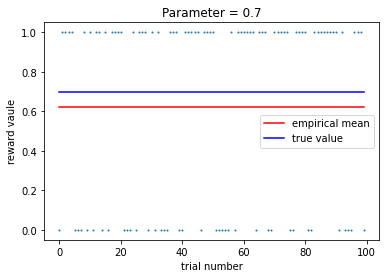

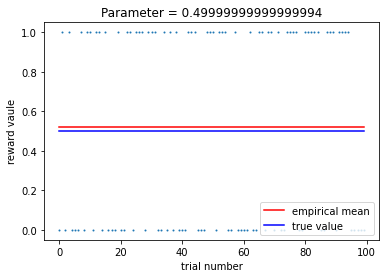

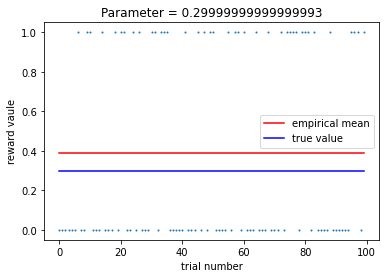

In [ ]:
import matplotlib.pyplot as plt

samples_100 = []
delta = 0.2
param_list = [0.7, 0.7 - delta, 0.7 - 2*delta]
for i in range (100):
  samples_100.append(Bernoulli_K_Bandit(param_list))

samples_100 = np.transpose(np.array(samples_100))

##################### plot one graph for each action, so we need 3 plots ##########################
for i in range(3):
  empirical_mean = np.mean(samples_100[i,:])
  empirical_mean_100 = np.full(100, empirical_mean)
  true_value_100 = np.full(100, param_list[i])
  plt.plot(range(100), empirical_mean_100, 'r',label = 'empirical mean')
  plt.plot(range(100), true_value_100, 'b',label = 'true value')
  plt.scatter(range(100),samples_100[i,:],1)
  plt.legend()
  plt.xlabel('trial number')
  plt.ylabel('reward vaule')
  plt.title('Parameter = ' + str(param_list[i]))
  plt.show()

3. [10 points] Code the rule for estimating action values discussed in lecture 2, with a fixed learning
rate $\alpha$, in a function called ”update”, and using the incremental computation of the mean presented
in lecture 2, in a function called updateAvg Using the previous data, plot for each action a graph
showing the estimated q value as a function of the number of samples, using averaging as well as
$\alpha$ = 0.01 and $\alpha$ = 0.1, and the true value. Each graph should have two curves and a horizontal
line.


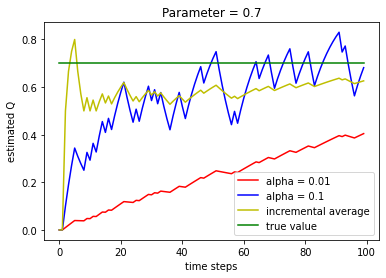

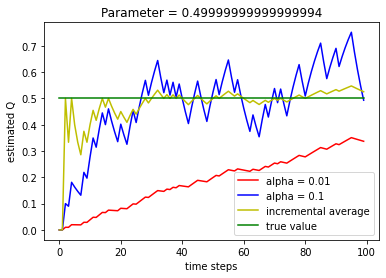

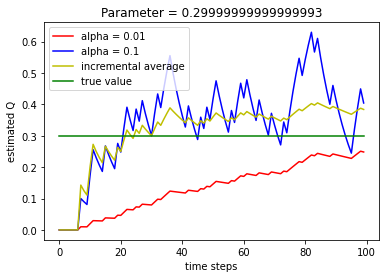

In [ ]:
Q_1 = 0

def update(alpha,current_ind, reward_list):
  Q_next_pre = ((1-alpha) ** (current_ind + 1)) * Q_1
  for i in range(1, current_ind + 2): ########### here I perform the summation with weighted alpha... I may make mistakes about the indices...
    Q_next_pre = Q_next_pre + alpha * ((1 - alpha) ** (current_ind + 1 - i)) * reward_list[i - 1]
  return Q_next_pre

def updateAvg(current_ind, Q_current, reward_list):
  Q_next = Q_current + 1/(current_ind + 1) * (reward_list[current_ind] - Q_current)
  return Q_next

##################### plot one graph for each action, so we need 3 plots ##########################
for i in range(3):
  true_value_100 = np.full(100, param_list[i])
  Q_alpha_001 = [Q_1]
  Q_alpha_01 = [Q_1]
  Q_avg = [Q_1]
  for j in range(99):
    Q_alpha_001.append(update(0.01,j,samples_100[i,:]))
    Q_alpha_01.append(update(0.1,j,samples_100[i,:]))
    Q_avg.append(updateAvg(j,Q_avg[-1],samples_100[i,:])) ########## Q_avg[-1] because we are taking the last appended estimate as Q_n

  plt.plot(range(100), Q_alpha_001, 'r',label = 'alpha = 0.01')
  plt.plot(range(100), Q_alpha_01, 'b',label = 'alpha = 0.1')
  plt.plot(range(100), Q_avg, 'y',label = 'incremental average')
  plt.plot(range(100), true_value_100, 'g',label = 'true value')
  # plt.scatter(range(100),samples_100[i,:],1)
  plt.legend()
  plt.xlabel('time steps')
  plt.ylabel('estimated Q')
  plt.title('Parameter = ' + str(param_list[i]))
  plt.show()

4. [10 points] Repeat the above experiment 500 times, starting with action value estimates of 0. Each
run will still contain 100 samples for each action. Plot the same graph as above, but where the
curves have the average and standard error over the 5 runs. Explain in 1-2 sentences what you
observe. Which of the $\alpha$ values is better? How do they compare to averaging? If you wanted to
optimize further, in what range of $\alpha$ would you look for better values?

**All three curves converge to the true value as time steps increases, yet with different speed and variance. Alpha of 0.1 converges to the true value at around 30 time steps, much faster than 0.01 which never reach the true value within the first 100 time steps. But alpha of 0.1 has much greater variance than 0.01. Averaging converges to the true value the fastest within the first few timesteps, with an intermediate level of variance between alpha of 0.01 and 0.1, decreasing as time passes by. To further optimize, we should look for alpha between 0.1 and 0.01, maybe around 0.05. **

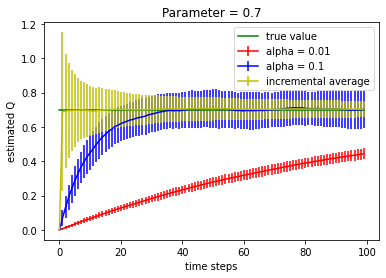

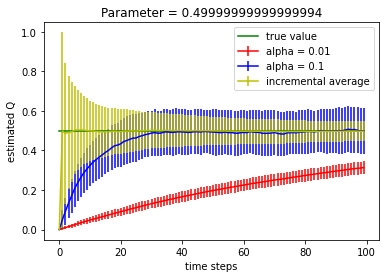

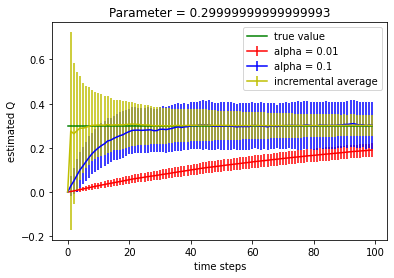

In [ ]:
# Q_1 = 0

def run(Q_1):
  #generate a new set of 100 reward samples for each run
  samples_100 = []
  delta = 0.2
  param_list = [0.7, 0.7 - delta, 0.7 - 2*delta]
  for i in range (100):
    samples_100.append(Bernoulli_K_Bandit(param_list))

  samples_100 = np.transpose(np.array(samples_100))

  three_params_Q_alpha_001 = []
  three_params_Q_alpha_01 = []
  three_params_Q_avg = []

  for i in range(3):
    Q_alpha_001 = [Q_1]
    Q_alpha_01 = [Q_1]
    Q_avg = [Q_1]
    for j in range(99):
      Q_alpha_001.append(update(0.01,j,samples_100[i,:]))
      Q_alpha_01.append(update(0.1,j,samples_100[i,:]))
      Q_avg.append(updateAvg(j,Q_avg[-1],samples_100[i,:])) ########## Q_avg[-1] because we are taking the last appended estimate as Q_n
    three_params_Q_alpha_001.append(Q_alpha_001)
    three_params_Q_alpha_01.append(Q_alpha_01)
    three_params_Q_avg.append(Q_avg)

  return three_params_Q_alpha_001, three_params_Q_alpha_01, three_params_Q_avg

five_three_params_Q_alpha_001 = [] # containing 5 runs' three_params_Q_alpha_001, size should be 5,3,100
five_three_params_Q_alpha_01 = []
five_three_params_Q_avg = []

for i in range(500):
  three_params_Q_alpha_001, three_params_Q_alpha_01, three_params_Q_avg = run(0)
  five_three_params_Q_alpha_001.append(three_params_Q_alpha_001)
  five_three_params_Q_alpha_01.append(three_params_Q_alpha_01)
  five_three_params_Q_avg.append(three_params_Q_avg)

five_three_params_Q_alpha_001 = np.array(five_three_params_Q_alpha_001)
five_three_params_Q_alpha_01 = np.array(five_three_params_Q_alpha_01)
five_three_params_Q_avg = np.array(five_three_params_Q_avg)

for m in range(3):
  true_value_100 = np.full(100, param_list[m])

  mean_Q_alpha_001 = np.mean(np.squeeze(five_three_params_Q_alpha_001[:,m,:]),axis=0) # shape originally should be 5,1,100, after squeezing should be 5,100, after mean should be 1,100
  mean_Q_alpha_01 = np.mean(np.squeeze(five_three_params_Q_alpha_01[:,m,:]),axis=0)
  mean_Q_avg = np.mean(np.squeeze(five_three_params_Q_avg[:,m,:]),axis=0)

  std_Q_alpha_001 = np.std(np.squeeze(five_three_params_Q_alpha_001[:,m,:]),axis=0) # shape originally should be 5,1,100, after squeezing should be 5,100, after mean should be 1,100
  std_Q_alpha_01 = np.std(np.squeeze(five_three_params_Q_alpha_01[:,m,:]),axis=0)
  std_Q_avg = np.std(np.squeeze(five_three_params_Q_avg[:,m,:]),axis=0)

  plt.errorbar(range(100), mean_Q_alpha_001, fmt='r', yerr=std_Q_alpha_001, label = 'alpha = 0.01')
  plt.errorbar(range(100), mean_Q_alpha_01, fmt='b', yerr=std_Q_alpha_01, label = 'alpha = 0.1')
  plt.errorbar(range(100), mean_Q_avg, fmt='y', yerr=std_Q_avg, label = 'incremental average')



  plt.plot(range(100), true_value_100, 'g',label = 'true value')
  plt.legend()
  plt.xlabel('time steps')
  plt.ylabel('estimated Q')
  plt.title('Parameter = ' + str(param_list[m]))
  plt.show()

5. [20 points] Code the epsilon-greedy algorithm discussed in class, with averaging updates, with epsilon provided
as an input. We will run 500 independent runs. In each run, we will have 1000 time steps. We are interested in the following graphs:

  (a) The reward received over time, averaged at each time step over the 5 independent runs (with no smoothing over the time steps), and the standard error over the 5 runs

  (b) The fraction of runs (out of 5) in which action 1 (which truly is best) is also estimated best based on the q values

  (c) The instantaneous regret lt (as discussed in lecture 3) (averaged over the 5 runs)

  (d) The total regret Lt up to time step t (as discussed in lecture 3) (averaged over the 5 runs)

  Generate this set of graphs, for the following values of $\epsilon$: 0, 1/8, 1/4, 1/2, 1. Explain what you observe in the graphs. What is the best value of $\epsilon$ to use?

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt


def sample(ind, prob_list):
    # print(f'probability: {prob_list[ind]}')
    return np.random.binomial(1, prob_list[ind])

def run_eps_greedy(epsilons, k, param_list, initial_Q, num_of_iterations=1000, seed=234, num_of_runs=500, plots=[True, True, True, True],
                   true_optimal_idx=0, predefined_explore=None, ):
    # one run of the eps_greedy algorithm
    # initialize the parameters: Q(a), N(a) with a: 0 ~ (k - 1)
    for epsilon in epsilons:
        Q = np.full((num_of_runs, k), initial_Q, dtype=np.float64)
        N = np.full((num_of_runs, k), 0)
        fraction_optimal = np.zeros(num_of_iterations, dtype=np.float64)
        insta_regrets = np.zeros(num_of_iterations, dtype=np.float64)
        total_regrets = np.zeros(num_of_iterations, dtype=np.float64)
        if seed:
            random.seed(seed)
        if not predefined_explore:
            explore = [[random.random() < epsilon for _ in range(num_of_iterations)] for _ in
                   range(num_of_runs)]  # whether we should explore in each iteration
        else:
            explore = predefined_explore
        Rs = np.zeros(num_of_iterations, )
        R_error = np.zeros(num_of_iterations, )
        for i in range(0, num_of_iterations):

            """
            Q 0 q 0
            R - Q[1] - 1
            500 - 500 * (0.7 - delta)
            """
            # for each iteration,
            Rt = np.zeros(num_of_runs, )
            optimal_chosen = 0
            l_t = np.zeros(num_of_runs, dtype=np.float64)
            for j in range(num_of_runs):
                if explore[j][i]:
                    # explore
                    action_idx = random.randint(0, k - 1)
                    # print(f'explore index: {action_idx}')
                else:
                    # print(Q[])
                    action_idx = np.random.choice(
                        np.flatnonzero(Q[j, :] == Q[j, :].max()))  # if exploit, break ties randomly
                    # print(f'exploit index: {action_idx}')
                # p = param_list[action_idx]
                if true_optimal_idx == action_idx:
                    optimal_chosen += 1

                N[j][action_idx] += 1
                Rt[j] = sample(action_idx, param_list)
                l_t[j] = 0.7 - Q[j][action_idx]

                Q[j][action_idx] = Q[j][action_idx] + (Rt[j] - Q[j][action_idx]) / N[j][action_idx]
                # print(f'difference: {(Rt[j] - Q[j][action_idx]) / N[j][action_idx]}')
                # print(f'Q after update: {Q[j, :]}\n\n')
            fraction_optimal[i] = optimal_chosen / num_of_runs

            # get the average reward at each time step
            Rs[i] = Rt.mean()
            R_error[i] = np.std(Rt)
            insta_regrets[i] = l_t.mean()
            total_regrets[i:] += insta_regrets[i]

        if plots[0]:
            plt.figure(1)

            markers, caps, bars = plt.errorbar(range(1000), Rs, yerr=R_error, label=f'epsilon = {epsilon}')
            [bar.set_alpha(0.1) for bar in bars]
            [cap.set_alpha(0.1) for cap in caps]

            # plt.plot(Rs, label=f'epsilon = {epsilon}')
            plt.title('Reward vs Time')
            plt.xlabel('Time')
            plt.ylabel('Reward')
            plt.legend([f'epsilon={eps}' for eps in epsilons])

        if plots[1]:
            plt.figure(2)
            plt.plot(fraction_optimal, label=f'epsilon = {epsilon}')
            plt.title('% Optimal Actions vs Time')
            plt.xlabel('Time')
            plt.ylabel('% Optimal Actions')
            plt.legend([f'epsilon={eps}' for eps in epsilons])

        if plots[2]:
            plt.figure(3)
            plt.plot(insta_regrets, label=f'epsilon = {epsilon}')
            plt.title('Instantaneous Regret vs Time')
            plt.xlabel('Time')
            plt.ylabel('Instantaneous Regret')
            plt.legend([f'epsilon={eps}' for eps in epsilons])

        if plots[3]:
            plt.figure(4)
            plt.plot(total_regrets, label=f'epsilon = {epsilon}')
            plt.title('Total Regret vs Time')
            plt.xlabel('Time')
            plt.ylabel('Total Regret')
            plt.legend([f'epsilon={eps}' for eps in epsilons])

    if plots and plots != [False, False, False, False]:
        plt.show()


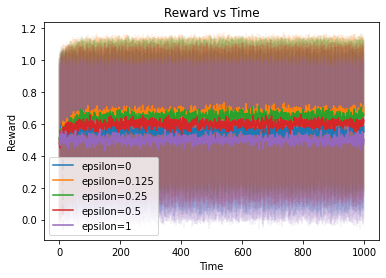

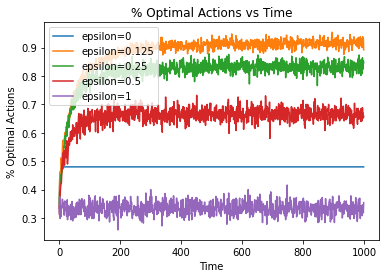

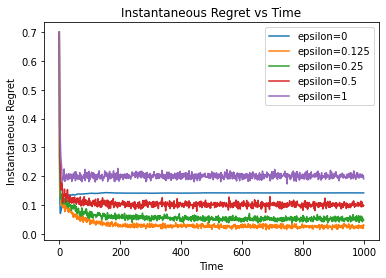

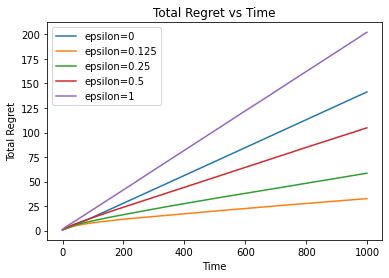

In [ ]:
# Q5
k = 3  # number of arms
delta = 0.2
param_list = [0.7, 0.7 - delta, 0.7 - 2 * delta]
run_eps_greedy([0, 1/8, 1/4, 1/2, 1], 3, param_list, 0, num_of_iterations=1000, num_of_runs=500, seed=None)

When $\epsilon$ = 0, we only exploit, therefore, once we have a reward of 1, the algorithm then locks onto it forever. When $\epsilon$ = 1, the algorithm keeps picking random action (explores), therefore the percentage of optimal actions remain steady around 1/3. Among $\epsilon$ = 0.125, 0.25 and 0.5, as $\epsilon$ increases, at the beginning, there is more time for the agents to explore, so the rewards increases faster. However, in the later phase, the agents with a larger $\epsilon$ had to choose a random action more than a smaller $\epsilon$, which explains a decrease in rewards as $\epsilon$ increases. Similarly, larger $\epsilon$ gives a larger total regrets, with all the total regrets being linear for all $\epsilon$.

The best $\epsilon$ is 0.125.

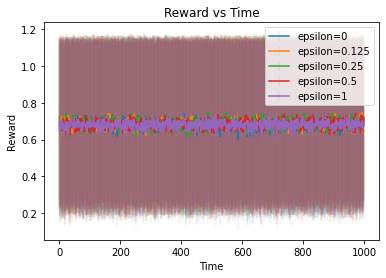

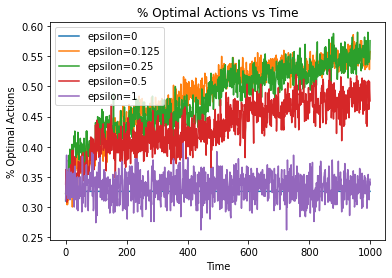

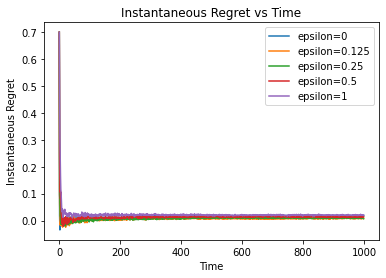

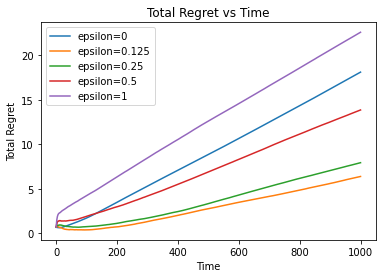

In [ ]:
# Q6
k = 3  # number of arms
delta = 0.02
param_list = [0.7, 0.7 - delta, 0.7 - 2 * delta]
run_eps_greedy([0, 1/8, 1/4, 1/2, 1], 3, param_list, 0, num_of_iterations=1000, num_of_runs=500, seed=None)

With delta = 0.02, the k-arm bandit algorithm converges slower than delta = 0.2. The reason is that in each step, with a smaller delta, the Q values will have a smaller difference within different lever. In the end, the algorithm will converge to the first lever.

The reward for each value settled in the same value because in the end, the algorithm will keep choosing the first lever with a proability of 1 - $\epsilon$ = 0.75. The instataneous regrets are less than when delta = 0.2.

The total regret and instantaneous regret for $\epsilon$ = 0.02 are both less than $\epsilon$ = 0.2. Since the probability for each lever are now closer to each other. It makes sense that V* - Q(a) is smaller, thus a smaller instantaneous and total regret.

Q7. Write a function that decays $\epsilon$, but in a simpler way than discussed in lecture 3. This algorithm will take as input $\epsilon$ and a decay factor λ ∈ (0, 1) and will multiply $\epsilon$ by λ at every step: $\epsilon$ ← $\epsilon$λ. Run the same experiment as above, with δ = 0.2 but with a fixed starting value $\epsilon$ = 1/2 and values of λ = 0.999 and λ = 0.99. Explain what you observe, and compare to the fixed $\epsilon$ case.


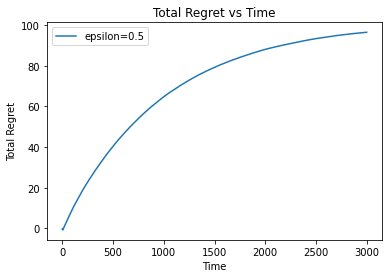

In [ ]:
k = 3  # number of arms
delta = 0.2
epsilon = 1 / 2
param_list = [0.7, 0.7 - delta, 0.7 - 2 * delta]

def generate_explore(rate, epsilon, num_of_runs, num_of_iterations):
    return [[random.random() < epsilon * (rate ** i) for i in range(num_of_iterations)] for _ in range(num_of_runs)]

# run 1:
rate = 0.999
explore_matrix = generate_explore(rate, epsilon, 500, 3000)
run_eps_greedy([epsilon], 3, param_list, 1, num_of_iterations=3000, num_of_runs=500, seed=None, predefined_explore=explore_matrix, plots=[False, False, False, True])

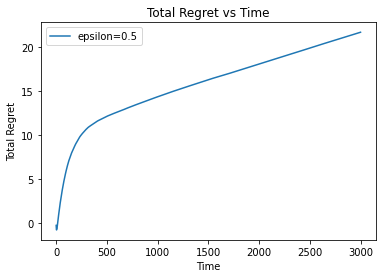

In [ ]:
# run 2:
rate = 0.99
explore_matrix = generate_explore(rate, epsilon, 500, 3000)
run_eps_greedy([epsilon], 3, param_list, 1, num_of_iterations=3000, num_of_runs=500, seed=None, predefined_explore=explore_matrix, plots=[False, False, False, True])

Compared to the fixed $\epsilon$, the total regret is now sublinear. With a smaller lambda, epsilon degrades faster, leaving a smaller total regret in the same time window. In the end, both values of lambda leads to the agent exploiting more and exploring less.

8. [15 points] Let us now consider a non-stationary problem. Let δ = 0.1 and imagine that after
500 time steps, the parameter of actions 2 and 3 become 0.7 + δ and 0.7 + 2δ respectively. We
will compare 4 conditions: fixed $\alpha$ vs averaging and fixed  vs decaying. Based on your previous
experimentations, pick values of $\alpha$,  and λ that you want to use, and explain why you picked
these. Using these values, run 5 runs and plot the reward graph averaged over these runs. The
graph should have 4 lines (with standard error bars). Explain what you see in the graph. Based on
these results, which condition is best suited to cope with non-stationarity?

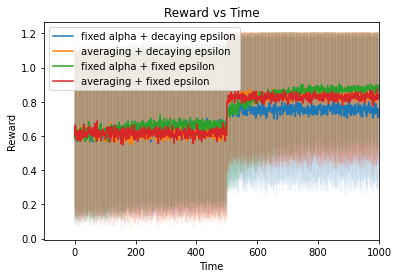

In [ ]:
#@title Default title text
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_explore(rate, epsilon, num_of_runs, num_of_iterations):
    return [[random.random() < epsilon * (rate ** i) for i in range(num_of_iterations)] for _ in range(num_of_runs)]


def run_eps_greedy(epsilon, k, delta, initial_Q, num_of_iterations=1000, seed=234, num_of_runs=5000, predefined_explore=None, alpha=0.0):
    # one run of the eps_greedy algorithm
    # initialize the parameters: Q(a), N(a) with a: 0 ~ (k - 1)
    Q = np.full((num_of_runs, k), initial_Q, dtype=np.float64)
    N = np.full((num_of_runs, k), 0)
    if seed:
        random.seed(seed)
    if not predefined_explore:
        explore = [[random.random() < epsilon for _ in range(num_of_iterations)] for _ in
                   range(num_of_runs)]  # whether we should explore in each iteration
    else:
        explore = predefined_explore
    Rs = np.zeros(num_of_iterations, )
    Rs_error = np.zeros(num_of_iterations, )

    for i in range(0, num_of_iterations):
        if i <= 499:
            param_list = [0.7, 0.7 - delta, 0.7 - 2 * delta]
            true_optimal_idx = 0
            optimal_reward = 0.7

        else:
            param_list = [0.7, 0.7 + delta, 0.7 + 2 * delta]
            true_optimal_idx = 2
            optimal_reward = 0.7 + 2 * delta
        """
        Q 0 q 0
        R - Q[1] - 1
        500 - 500 * (0.7 - delta)
        """
        # for each iteration,
        Rt = np.zeros(num_of_runs, )
        optimal_chosen = 0
        l_t = np.zeros(num_of_runs, dtype=np.float64)
        for j in range(num_of_runs):
            if explore[j][i]:
                # explore
                action_idx = random.randint(0, k - 1)
                # print(f'explore index: {action_idx}')
            else:
                # print(Q[])
                action_idx = np.random.choice(
                    np.flatnonzero(Q[j, :] == Q[j, :].max()))  # if exploit, break ties randomly
                # print(f'exploit index: {action_idx}')
            # p = param_list[action_idx]
            if true_optimal_idx == action_idx:
                optimal_chosen += 1

            N[j][action_idx] += 1
            Rt[j] = sample(action_idx, param_list)
            l_t[j] = optimal_reward - Q[j][action_idx]

            alpha = 1 / N[j][action_idx] if alpha == 0 else alpha # if there is a fixed alpha provided, use the fixed alpha, else use averaging

            Q[j][action_idx] = Q[j][action_idx] + (Rt[j] - Q[j][action_idx]) * alpha
            # print(f'difference: {(Rt[j] - Q[j][action_idx]) / N[j][action_idx]}')
            # print(f'Q after update: {Q[j, :]}\n\n')

        # get the average reward at each time step
        Rs[i] = Rt.mean()
        Rs_error[i] = np.std(Rt)
    return Rs, Rs_error


def plot(Rss, Rs_error, labels):
    plt.figure(1)

    plt.xlim(-100, 1000)
    for i in range(len(Rss)):
        markers, caps, bars = plt.errorbar(range(1000), Rss[i], yerr=Rs_error[i])
        # plt.errorbar(range(1000), Rs, yerr=R_error, label=f'temperature = {T}')
        [bar.set_alpha(0.05) for bar in bars]
        [cap.set_alpha(0.05) for cap in caps]
        # plt.plot(Rss[i])
        plt.title(f'Reward vs Time')
        plt.xlabel('Time')
        plt.ylabel('Reward')
        plt.legend(labels)
    plt.show()


k = 3  # number of arms
delta = 0.2
# param_list = [0.7, 0.7 - delta, 0.7 - 2 * delta]
# run_eps_greedy([0, 1/8, 1/4, 1/2, 1], 3, param_list, 0, num_of_iterations=1000, num_of_runs=500, seed=None)
epsilon = 0.125
explore_matrix = generate_explore(0.99, epsilon, 500, 1000)
R1, RE1 = run_eps_greedy(0.125, 3, 0.1, 0, num_of_iterations=1000, num_of_runs=500, seed=None, alpha=0.1, predefined_explore=explore_matrix)
R2, RE2 = run_eps_greedy(0.125, 3, 0.1, 0, num_of_iterations=1000, num_of_runs=500, seed=None, predefined_explore=explore_matrix)

R3, RE3 = run_eps_greedy(0.125, 3, 0.1, 0, num_of_iterations=1000, num_of_runs=500, seed=None, alpha=0.1)
R4, RE4 = run_eps_greedy(0.125, 3, 0.1, 0, num_of_iterations=1000, num_of_runs=500, seed=None)

plot([R1, R2, R3, R4], [RE1, RE2, RE3, RE4], ['fixed alpha + decaying epsilon', 'averaging + decaying epsilon', 'fixed alpha + fixed epsilon', 'averaging + fixed epsilon'])

For the choice of $\alpha$, $\epsilon$ and $\lambda$. $\epsilon$ = 0.125 was chosen because it was the best performing $\epsilon$ values from question 5. Since our algorithm converges to the correct result rather quickly, from question 7 we know that a decay factor $\lambda$ = 0.99 should already suffice to exhibit result over a relatively shorter period of time. In the cases of fixed $\alpha$, $\alpha$ = 0.1 was chosen because as we approach the optimal reward, if $\alpha$ is too large, we may put too much weights on the most recent value change and achieve suboptimal results.

From the graph we can see that, at 500 iteration as the probilities in the param_list changes, the rewards for an averaging $\alpha$ climbs up abruptly and became stable at some level. In contrast, with a fixed $\alpha$, the rewards curve slowly climbs up to adapt to the changes in the probilities, in the end stable at a higher reward. This is because fixed alpha considers all updates on action values with the same weights, which adapts better to a change in the environment. With a decaying $\epsilon$ in a stationary problem, the agent can arrive at a better reward over long iterations because the agent can exploit more over time and after it arrives at an optimal action. However, in an non-stationary environment, a fixed $\epsilon$ is better because it ensures that the agent performs sufficient explorations to adapt to the changes in the environment.

Overall, a fixed alpha + fixed epsilon should be better for non-stationary problems.

9. [20 points] Write a function that uses softmax (aka Boltzmann) exploration, as discussed in lecture 4. This function will use averaging for the value estimation, and fixed values of the temperature of
1000, 10, 1 and 0.1. Run the same experiment as above with δ = 0.2 and explain what you see.
Discuss the similarities and differences of softmax and epsilon-greedy based on these results.


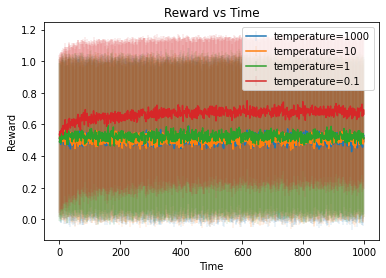

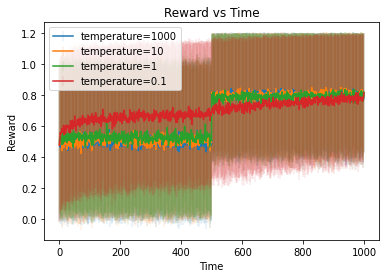

In [ ]:
# Compared with Q5
delta = 0.2
# epsilon = 1 / 2
param_list = [0.7, 0.7 - delta, 0.7 - 2 * delta]

def run_boltzmann(temperatures, k, param_list, initial_Q, num_of_iterations=1000, seed=234, num_of_runs=500, plots=True, non_stationary = False, non_stationary_delta = None):
  # one run of the boltzmann exploration algorithm
  # initialize the parameters: Q(a), N(a) with a: 0 ~ (k - 1)
  for T in temperatures:
      Q = np.full((num_of_runs, k), initial_Q, dtype=np.float64)
      N = np.full((num_of_runs, k), 0)
      H = Q / T # the preference for taking each action at the current time step
      Pr = np.exp(H) / np.sum(np.exp(H),axis=1)[:,None] # the probability for taking each action at the current time step, [:,None] adds one more dimension to allow for division of each row by corresponding element in the vector sum.
      Rs = np.zeros(num_of_iterations, )
      R_error = np.zeros(num_of_iterations, )

      for i in range(0, num_of_iterations):
        # for each iteration,
        Rt = np.zeros(num_of_runs, )

        if i == 500 and non_stationary and non_stationary_delta: # change param_list to [0.7, 0.7 + delta, 0.7 + 2 * delta] for the rest of time steps
          param_list = [0.7, 0.7 + non_stationary_delta, 0.7 + 2 * non_stationary_delta]

        for j in range(num_of_runs):
          action_idx = np.random.choice(k,p=Pr[j,:])
          N[j][action_idx] += 1
          Rt[j] = sample(action_idx, param_list)
          Q[j][action_idx] = Q[j][action_idx] + (Rt[j] - Q[j][action_idx]) / N[j][action_idx]
        H = Q / T # the change in positions of Q will be reflected in the same positions in H
        Pr = np.exp(H) / np.sum(np.exp(H),axis=1)[:,None] # change will be reflected in the whole row, because the dominator changes
        Rs[i] = Rt.mean()
        R_error[i] = np.std(Rt)
      if non_stationary and non_stationary_delta:
        param_list = [0.7, 0.7 - 0.2, 0.7 - 2 * 0.2]

      if plots:
        plt.figure(1)

        markers, caps, bars = plt.errorbar(range(1000), Rs, yerr=R_error, label=f'temperature = {T}')
        # plt.errorbar(range(1000), Rs, yerr=R_error, label=f'temperature = {T}')
        [bar.set_alpha(0.1) for bar in bars]
        [cap.set_alpha(0.1) for cap in caps]

        # plt.plot(Rs, label=f'epsilon = {epsilon}')
        plt.title('Reward vs Time')
        plt.xlabel('Time')
        plt.ylabel('Reward')
        plt.legend([f'temperature={T}' for T in temperatures])

  if plots:
    plt.show()

# Compared to Q5 stationary
run_boltzmann([1000, 10, 1, 0.1], 3, param_list, 0, num_of_iterations=1000, num_of_runs=500, seed=None)


# Compared to Q8 non-stationary
run_boltzmann([1000, 10, 1, 0.1], 3, param_list, 0, num_of_iterations=1000, num_of_runs=500, seed=None, non_stationary = True, non_stationary_delta = 0.1)


When the environment is stationary, the reward is inversely correlated to the temperature.